# Chapter 6 code

In [1]:
import tensorflow as tf

### Chapter 4 CNN - abstraction example

In [3]:
def weight_variable(shape): 
    initial = tf.truncated_normal(shape, stddev=0.1) 
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial) 

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], 
                       padding='SAME')

def conv_layer(input, shape): 
    W = weight_variable(shape) 
    b = bias_variable([shape[3]]) 
    h = tf.nn.relu(conv2d(input, W) + b) 
    hp = max_pool_2x2(h) 
    return hp


def max_pool_2x2(x): 
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
                         strides=[1, 2, 2, 1], padding='SAME')

h1 = conv_layer(x_image, shape=[5, 5, 1, 32]) 
h2 = conv_layer(h1, shape=[5, 5, 32, 64])

### contrib.learn preview

In [ ]:
regressor = learn.LinearRegressor(feature_columns=feature_columns,
                                  optimizer=optimizer)
regressor.fit(X, Y, steps=200, batch_size=506)

### Verbose code example 

In [ ]:
W1 = tf.truncated_normal([5, 5, 1, 32], stddev=0.1)
b1 = tf.constant(0.1, shape=32)
h1 = tf.nn.relu(conv2d(input, W1) + b1)
hp1 = max_pool_2x2(h1)
W2 = tf.truncated_normal([5, 5, 1, 64], stddev=0.1)
b2 = tf.constant(0.1, shape=64)
h2 = tf.nn.relu(conv2d(input, W2) + b2)
hp2 = max_pool_2x2(h2)
W3 = tf.truncated_normal([5, 5, 1, 64], stddev=0.1)
b3 = tf.constant(0.1, shape=64)
h3 = tf.nn.relu(conv2d(input, W3) + b3)
hp3 = max_pool_2x2(h3)

### Import line for contrib.learn

In [8]:
import tensorflow.contrib.learn.python.learn as learn


### Importing Boston household data

In [9]:
import tensorflow as tf 
from sklearn import datasets, metrics, preprocessing
boston = datasets.load_boston()
x_data = preprocessing.StandardScaler().fit_transform(boston.data)
y_data = boston.target
y_data = y_data.reshape(y_data.shape + (1,))

### Linear Regression model as in chapter 3

In [12]:
g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder('float32',shape=None)
    y_true = tf.placeholder('float32',shape=None)

    w = tf.Variable(tf.truncated_normal([x_data.shape[1],1]),
                    dtype='float32',name='weights')
    b = tf.Variable(tf.truncated_normal([1,1]),
                    dtype='float32',name='bias')

    y_pred = tf.matmul(x,w) + b
    loss = tf.reduce_mean(tf.square(y_true-y_pred))

    optimizer = tf.train.GradientDescentOptimizer(0.1)  
  
    init = tf.global_variables_initializer() 

    with tf.Session() as sess:
        sess.run(init)      
        for step in range(200):
            _,MSE = sess.run([train,loss],{x: x_data, 
                                           y_true: y_data})
        wb_ = sess.run([w,b])

print "MSE = {}".format(MSE)

# Output: MSE = 21.9036388397

### Now we perform the exact same process, but using the Estimator for linear regression offered by contrib.learn

In [15]:
import tensorflow.contrib.learn.python.learn as learn

optimizer = tf.train.GradientDescentOptimizer(0.1)

feature_columns = learn.infer_real_valued_columns_from_input(x_data)
regressor = learn.LinearRegressor(feature_columns=feature_columns,
                                  optimizer=optimizer)
regressor.fit(x_data, boston.target, steps=200, batch_size=506)
results = regressor.evaluate(x_data, boston.target, steps=1)

print results

# Output: {'loss': 21.902138, 'global_step': 200}

### Made-up data generation

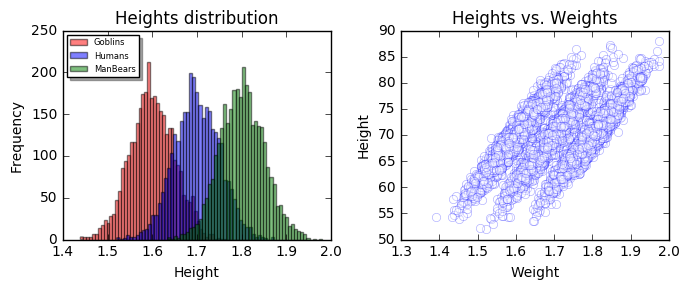

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

N = 10000

weight = np.random.randn(N)*5+70
spec_id = np.random.randint(0,3,N)
bias = [0.9,1,1.1]
height = np.array([weight[i]/100 + bias[b] for i,b in enumerate(spec_id)])
spec_name = ['Goblin','Human','ManBears']
spec = [spec_name[s] for s in spec_id]




colors = ['r','b','g']
f,axarr = plt.subplots(1,2,figsize = [7,3])
ax = axarr[0]
for ii in range(3):
    ax.hist(height[spec_id == ii],50,color=colors[ii],alpha=0.5)
    ax.set_xlabel('Height')
    ax.set_ylabel('Frequency')
    ax.set_title('Heights distribution')
ax.legend(['Goblins','Humans','ManBears'],loc=2, shadow=True,prop={'size':6})
height = height + np.random.randn(N)*0.015


df = pd.DataFrame({'Species':spec,'Weight':weight,'Height':height})


ax = axarr[1]

ax.plot(df['Height'],df['Weight'],'o',alpha=0.3,mfc='w',mec='b')
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_title('Heights vs. Weights')
    
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight', format='png', dpi=500)

plt.show()

### Create FeatureColumn

In [20]:
Weight = tf.contrib.layers.real_valued_column("Weight")

Species=tf.contrib.layers.sparse_column_with_keys(
    column_name="Species", keys=['Goblin','Human','ManBears'])

### Create regressor instance

In [19]:
reg = tf.contrib.learn.LinearRegressor(feature_columns=[Weight,Species])

### Create input function

In [21]:
def input_fn(df):
    feature_cols = {}
    feature_cols['Weight'] = tf.constant(df['Weight'].values)
    
    feature_cols['Species'] =  tf.SparseTensor(
    indices=[[i, 0] for i in range(df['Species'].size)],
    values=df['Species'].values,
    shape=[df['Species'].size, 1])
                    
    labels = tf.constant(df['Height'].values)

    return feature_cols, labels

### Feed input function (as a function) and fit model

In [68]:
reg.fit(input_fn=lambda:input_fn(df), steps=50000)


### Splitting the training process

In [ ]:
reg.fit(input_fn=lambda:input_fn(df), steps=10000)
reg.fit(input_fn=lambda:input_fn(df), steps=10000)
reg.fit(input_fn=lambda:input_fn(df), steps=10000)
reg.fit(input_fn=lambda:input_fn(df), steps=10000)
reg.fit(input_fn=lambda:input_fn(df), steps=10000)

### Print estimated results

In [23]:
w_w = reg.get_variable_value('linear/Weight/weight')
print 'Estimation for Weight: {}'.format(w_w)

s_w = reg.get_variable_value('linear/Species/weights')
b = reg.get_variable_value('linear/bias_weight')
print 'Estimation for Species: {}'.format(s_w + b)

### Load MNIST data

In [70]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
DATA_DIR = '/tmp/data'
NUM_STEPS = 1000
MINIBATCH_SIZE = 100
data = input_data.read_data_sets(DATA_DIR, one_hot=False)
x_data, y_data = data.train.images,np.int64(data.train.labels)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Optimize using contrib

In [73]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
feature_columns = learn.infer_real_valued_columns_from_input(x_data)

lin_class = learn.LinearClassifier(feature_columns=feature_columns,optimizer=optimizer,n_classes=10)

lin_class.fit(x_data, y_data, steps=NUM_STEPS, 
           batch_size=MINIBATCH_SIZE)
results = lin_class.evaluate(x_data, y_data, steps=1)



# Output: INFO:tensorflow:Saving evaluation summary for step 1000: 
#                         accuracy = 0.92, loss = 0.28606

## Adding TensorBoard

### Setting severity level

In [74]:
tf.logging.set_verbosity(tf.logging.INFO)

### Set validation metrics

In [76]:
from tensorflow.contrib.learn.python.learn.metric_spec import MetricSpec

validation_metrics = {
    "accuracy" : MetricSpec(
        metric_fn=tf.contrib.metrics.streaming_accuracy,
        prediction_key="classes"),
    "precision" : MetricSpec(
        metric_fn=tf.contrib.metrics.streaming_precision,
        prediction_key="classes"),
    "recall" : MetricSpec(
        metric_fn=tf.contrib.metrics.streaming_recall,
        prediction_key="classes"),
    "mean" : MetricSpec(
        metric_fn=tf.contrib.metrics.streaming_mean,
        prediction_key="classes"),
    "abs_error" : MetricSpec(
        metric_fn=tf.contrib.metrics.streaming_mean_absolute_error,
        prediction_key="classes")
        }

### Configure the "ValidationMonitor

In [25]:
validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    data.test.images,
    np.int64(data.test.labels),
    every_n_steps=100,
    metrics=validation_metrics)

### INstantiating classifier

In [26]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
feature_columns = learn.infer_real_valued_columns_from_input(x_data)
classifier = learn.LinearClassifier(feature_columns=feature_columns,
               optimizer=optimizer,
               n_classes=10,
               model_dir="MNIST_contrib/",
               config=tf.contrib.learn.RunConfig(save_checkpoints_secs=1))


### Fit and get informative outputs

In [81]:

classifier.fit(x_data, y_data, steps=NUM_STEPS, batch_size=MINIBATCH_SIZE,
              monitors=[validation_monitor])

# Output: 
# INFO:tensorflow:Saving evaluation summary for step 1: 
# abs_error = 2.9007, 
# accuracy = 0.3647, 
# loss = 1.90781, 
# mean = 4.67392, 
# precision = 1.0, 
# recall = 0.99793

# INFO:tensorflow:Saving evaluation summary for step 101: 
# abs_error = 0.4103, 
# accuracy = 0.894, 
# loss = 0.387592, 
# mean = 6.09603, 
# precision = 1.0, 
# recall = 1.0

# INFO:tensorflow:Saving evaluation summary for step 901: 
# abs_error = 0.2949, 
# accuracy = 0.9215, 
# loss = 0.288098, 
# mean = 6.14309, 
# precision = 1.0, 
# recall = 1.0

### Early stopping

In [82]:
  validation_monitor = tf.contrib.learn.monitors.ValidationMonitor(
    data.test.images,
    np.int64(data.test.labels),
    every_n_steps=100,
    metrics=validation_metrics,
    early_stopping_metric="accuracy",
    early_stopping_metric_minimize=False,
    early_stopping_rounds=300)

Instructions for updating:
Monitors are deprecated. Please use tf.train.SessionRunHook.


## CNN using contrib.learn

### Reshape MNIST data

In [84]:
x_image = tf.reshape(x_data, [-1, 28, 28, 1])


### 2d convolution

In [94]:
from tensorflow.contrib import layers


conv1 = layers.convolution2d(x_image, 32, [5,5],
            activation_fn=tf.nn.relu,
            biases_initializer=tf.constant_initializer(0.1),
            weights_initializer=tf.truncated_normal_initializer(stddev=0.1))

### Pooling

In [89]:
 pool1 = layers.max_pool2d(conv1, [2,2])


### Flatten data and fully connected layer

In [91]:
pool2_flat = tf.reshape(pool2, [-1, 7*7*64]) 
fc1 = layers.fully_connected(pool2_flat, 1024,
          activation_fn=tf.nn.relu,
          biases_initializer=tf.constant_initializer(0.1),
          weights_initializer=tf.truncated_normal_initializer(stddev=0.1))

### Set dropouts and another fully connected

In [96]:
fc1_drop = layers.dropout(fc1, keep_prob=params["dropout"], 
                            is_training=(mode == 'train')) 
y_conv = layers.fully_connected(fc1_drop, 10, activation_fn=None)

### Full model code

In [100]:
def model_fn(x, target, mode, params):
    y_ = tf.cast(target, tf.float32)
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    # Conv layer 1
    conv1 = layers.convolution2d(x_image, 32, [5,5],
                activation_fn=tf.nn.relu,
                biases_initializer=tf.constant_initializer(0.1),
                weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    pool1 = layers.max_pool2d(conv1, [2,2])

    # Conv layer 2
    conv2 = layers.convolution2d(pool1, 64, [5,5],
                activation_fn=tf.nn.relu,
                biases_initializer=tf.constant_initializer(0.1),
                weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    pool2 = layers.max_pool2d(conv2, [2,2])

    # FC layer
    pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
    fc1 = layers.fully_connected(pool2_flat, 1024,
              activation_fn=tf.nn.relu,
              biases_initializer=tf.constant_initializer(0.1),
              weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    fc1_drop = layers.dropout(fc1, keep_prob=params["dropout"],
        is_training=(mode == 'train'))

    # readout layer
    y_conv = layers.fully_connected(fc1_drop, 10, activation_fn=None)

    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
    train_op = tf.contrib.layers.optimize_loss(
        loss=cross_entropy,
        global_step=tf.contrib.framework.get_global_step(),
        learning_rate=params["learning_rate"],
        optimizer="Adam")

    predictions = tf.argmax(y_conv, 1)
    return predictions, cross_entropy, train_op


### Run model

In [118]:
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib import layers

data = input_data.read_data_sets(DATA_DIR, one_hot=True)
x_data, y_data = data.train.images,np.int32(data.train.labels)


model_params = {"learning_rate": 1e-4, "dropout": 0.5}

CNN = tf.contrib.learn.Estimator(
    model_fn=model_fn, params=model_params)

print("Starting training for %s steps max" % 5000)
CNN.fit(x=data.train.images,
        y=data.train.labels, batch_size=50,
        max_steps=5000)



### Print results

In [117]:
test_acc = 0
for ii in range(5):
    batch = data.test.next_batch(2000)
    predictions = list(CNN.predict(batch[0], as_iterable=True))
    test_acc = test_acc + (np.argmax(batch[1],1) == predictions).mean()

print test_acc/5

# output: 0.9872

## TFLearn

In [ ]:
import tflearn


### CNN

In [2]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# Data loading and basic trasformations
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
testX = testX.reshape([-1, 28, 28, 1])

# Building the network
CNN = input_data(shape=[None, 28, 28, 1], name='input')
CNN = conv_2d(CNN, 32, 5, activation='relu', regularizer="L2")
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)
CNN = conv_2d(CNN, 64, 5, activation='relu', regularizer="L2")
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)
CNN = fully_connected(CNN, 1024, activation=None)
CNN = dropout(CNN, 0.5)
CNN = fully_connected(CNN, 10, activation='softmax')
CNN = regression(CNN, optimizer='adam', learning_rate=0.0001,
                     loss='categorical_crossentropy', name='target')

# Training the network
model = tflearn.DNN(CNN,tensorboard_verbose=0,tensorboard_dir = 'MNIST_tflearn_board/',\
                    checkpoint_path = 'MNIST_tflearn_checkpoints/checkpoint')
model.fit({'input': X}, {'target': Y}, n_epoch=3, 
           validation_set=({'input': testX}, {'target': testY}),
           snapshot_step=1000,show_metric=True, run_id='convnet_mnist') 


## CNN evaluation

In [121]:
evaluation = model.evaluate({'input': testX},{'target': testY})
print(evaluation)

# Output: [0.98619999999999997]

[0.98609999999999998]


### Predictions

In [ ]:
import numpy as np
pred = model.predict({'input': testX})
print((np.argmax(testY,1)==np.argmax(pred,1)).mean())

# Output: 0.9862

### RNN (IMDB data)

In [24]:
import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

# Load data
train, test, _ = imdb.load_data(path='imdb.pkl', n_words=10000,
                                valid_portion=0.1)
X_train, Y_train = train
X_test, Y_test = test

# Sequence padding and Converting labels to binary vectors
X_train = pad_sequences(X_train, maxlen=100, value=0.)
X_test = pad_sequences(X_test, maxlen=100, value=0.)
Y_train = to_categorical(Y_train, nb_classes=2)
Y_test = to_categorical(Y_test, nb_classes=2)

# Building a stacked LSTM network with two LSTM layers
RNN = tflearn.input_data([None, 100])
RNN = tflearn.embedding(RNN, input_dim=10000, output_dim=128)

RNN = tflearn.lstm(RNN, 128, dropout=0.8)
RNN = tflearn.fully_connected(RNN, 2, activation='softmax')
RNN = tflearn.regression(RNN, optimizer='adam', learning_rate=0.001,
                         loss='categorical_crossentropy')

# Training the network
model = tflearn.DNN(RNN, tensorboard_verbose=0)
model.fit(X_train, Y_train, validation_set=(X_test, Y_test),
                                show_metric=True, batch_size=32)
